## spacy_text_classification : Exercise
In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [48]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


In [49]:
data = pd.read_json("news_dataset.json")
data.shape,data.head(),data.category.value_counts()

((7500, 2),
                                                 text  category
 0  Larry Nassar Blames His Victims, Says He 'Was ...     CRIME
 1       Woman Beats Cancer, Dies Falling From Horse      CRIME
 2  Vegas Taxpayers Could Spend A Record $750 Mill...    SPORTS
 3  This Richard Sherman Interception Literally Sh...    SPORTS
 4  7 Things That Could Totally Kill Weed Legaliza...  BUSINESS,
 SPORTS      2500
 CRIME       2500
 BUSINESS    2500
 Name: category, dtype: int64)

In [50]:
data["label_num"] = data.category.map({"CRIME":0,"SPORTS":1,"BUSINESS":2})
data.label_num.value_counts(),data.head()

(0    2500
 1    2500
 2    2500
 Name: label_num, dtype: int64,
                                                 text  category  label_num
 0  Larry Nassar Blames His Victims, Says He 'Was ...     CRIME          0
 1       Woman Beats Cancer, Dies Falling From Horse      CRIME          0
 2  Vegas Taxpayers Could Spend A Record $750 Mill...    SPORTS          1
 3  This Richard Sherman Interception Literally Sh...    SPORTS          1
 4  7 Things That Could Totally Kill Weed Legaliza...  BUSINESS          2)

In [51]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)
data['pre_processed_text'] = data["text"].apply(lambda x: preprocess(x))

In [52]:
data.head()

,text,category,label_num,pre_processed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [53]:
data["Text_vectors"] = data["pre_processed_text"].apply(lambda x: nlp(x).vector)

In [54]:
data.head()

,text,category,label_num,pre_processed_text,Text_vectors
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [55]:
X_train,X_test,y_train,y_test = train_test_split(data.Text_vectors,data.label_num,test_size = 0.2,random_state = 2022,stratify = data.label_num)
X_train.shape,y_test.value_counts()

((6000,),
 0    500
 1    500
 2    500
 Name: label_num, dtype: int64)

In [56]:
X_train_stack = np.stack(X_train)
X_test_stack = np.stack(X_test)
scaler = MinMaxScaler()
X_train_stack_scald = scaler.fit_transform(X_train_stack)
X_test_stack_scald = scaler.transform(X_test_stack)
X_test_stack_scald

array([[0.27817938, 0.5663708 , 0.74376684, ..., 0.40017802, 0.3794984 ,
        0.4469468 ],
       [0.63553566, 0.5524225 , 0.73191935, ..., 0.54046863, 0.4326021 ,
        0.40374613],
       [0.46244982, 0.59572685, 0.7960382 , ..., 0.5631015 , 0.37988418,
        0.33866048],
       ...,
       [0.5790279 , 0.49189818, 0.7403683 , ..., 0.44331828, 0.4465529 ,
        0.3923427 ],
       [0.51459134, 0.54347765, 0.73259276, ..., 0.52818173, 0.29404372,
        0.5041112 ],
       [0.5082389 , 0.54874676, 0.7986909 , ..., 0.31099242, 0.5199038 ,
        0.4578981 ]], dtype=float32)

## Attempt 1:

use spacy glove embeddings for text vectorization.

use Decision Tree as the classifier.

print the classification report.

In [57]:
decison_tree = DecisionTreeClassifier()
decison_tree.fit(X_train_stack_scald,y_train)
y_pred = decison_tree.predict(X_test_stack_scald)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       500
           1       0.71      0.72      0.71       500
           2       0.78      0.73      0.75       500

    accuracy                           0.73      1500
   macro avg       0.74      0.73      0.73      1500
weighted avg       0.74      0.73      0.73      1500



## Attempt 2:

use spacy glove embeddings for text vectorization.
use MultinomialNB as the classifier after applying the MinMaxscaler.
print the classification report.

In [58]:
NB_model = MultinomialNB()
NB_model.fit(X_train_stack_scald,y_train)
y_pred = NB_model.predict(X_test_stack_scald)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.85      0.77      0.81       500
           2       0.80      0.83      0.82       500

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



## Attempt 3:

use spacy glove embeddings for text vectorization.
use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
print the classification report.

In [59]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_stack_scald,y_train)
y_pred = KNN_model.predict(X_test_stack_scald)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       500
           1       0.92      0.83      0.87       500
           2       0.88      0.86      0.87       500

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



## Attempt 4:

use spacy glove embeddings for text vectorization.
use RandomForestClassifier as the classifier after applying the MinMaxscaler.
print the classification report.

In [60]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_stack_scald,y_train)
y_pred = RF_model.predict(X_test_stack_scald)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       500
           1       0.90      0.83      0.87       500
           2       0.85      0.89      0.87       500

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



## Attempt 5:

use spacy glove embeddings for text vectorization.
use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
print the classification report.

In [61]:
GBM_model = GradientBoostingClassifier()
GBM_model.fit(X_train_stack_scald,y_train)
y_pred = GBM_model.predict(X_test_stack_scald)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       500
           1       0.91      0.87      0.89       500
           2       0.88      0.92      0.90       500

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



<AxesSubplot:>

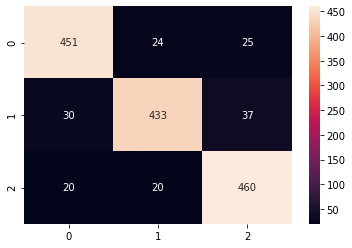

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot = True,fmt = "d")